In [1]:
! nvidia-smi

Sun May  1 09:28:31 2016       
+------------------------------------------------------+                       
| NVIDIA-SMI 352.79     Driver Version: 352.79         |                       
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 0000:04:00.0     Off |                    0 |
| N/A   55C    P0    62W / 149W |   9481MiB / 11519MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  Tesla K80           Off  | 0000:05:00.0     Off |                    0 |
| N/A   54C    P0   165W / 149W |  10313MiB / 11519MiB |     99%      Default |
+-------------------------------+----------------------+----------------------+
        

In [2]:
import os

currentDir = os.getcwd()
print currentDir

os.chdir('/home/dschreib/caffe_segnet')

import sys
sys.path.insert(0, './python')
import matplotlib
matplotlib.use('Agg')
import caffe

from pylab import *
%matplotlib inline

import numpy as np
import json
import scipy
import argparse
import math
import pylab
from sklearn.preprocessing import normalize

/home/dschreib/COGS185/SegNet_Tutorial/Scripts


In [3]:
args = {}
args['model'] = '/home/dschreib/COGS185/SegNet_Tutorial/Models/segnet_inference.prototxt'
args['weights'] = '/home/dschreib/COGS185/SegNet_Tutorial/Models/Inference/test_weights.caffemodel'
args['iter'] = '50'

print int(args['iter'])

50


In [ ]:
caffe.set_mode_gpu()

net = caffe.Net(args['model'],
                args['weights'],
                caffe.TEST)
#net.set_device(0)





In [ ]:
net.forward()






In [6]:
image = net.blobs['data'].data
label = net.blobs['label'].data
predicted = net.blobs['prob'].data
image = np.squeeze(image[0,:,:,:])
output = np.squeeze(predicted[0,:,:,:])
ind = np.argmax(output, axis=0)

In [7]:
r = ind.copy()
g = ind.copy()
b = ind.copy()
r_gt = label.copy()
g_gt = label.copy()
b_gt = label.copy()

Sky = [128,128,128]
Building = [128,0,0]
Pole = [192,192,128]
Road_marking = [255,69,0]
Road = [128,64,128]
Pavement = [60,40,222]
Tree = [128,128,0]
SignSymbol = [192,128,128]
Fence = [64,64,128]
Car = [64,0,128]
Pedestrian = [64,64,0]
Bicyclist = [0,128,192]
Unlabelled = [0,0,0]


In [8]:
print r_gt.size
print b_gt[0][0][0][0]

1036800
1.0


In [9]:

label_colours = np.array([Sky, Building, Pole, Road, Pavement, Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])
for l in range(0,11):
    r[ind==l] = label_colours[l,0]
    g[ind==l] = label_colours[l,1]
    b[ind==l] = label_colours[l,2]
    r_gt[label==l] = label_colours[l,0]
    g_gt[label==l] = label_colours[l,1]
    b_gt[label==l] = label_colours[l,2]


(360, 480)
(6, 1, 360, 480)


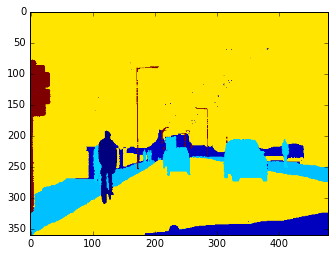

In [10]:
print r.shape
print r_gt.shape

imshow(r_gt[1,0,:,:])

In [11]:
rgb = np.zeros((ind.shape[0], ind.shape[1], 3))

print rgb.shape

(360, 480, 3)


In [12]:
rgb = np.zeros((ind.shape[0], ind.shape[1], 3))
rgb[:,:,0] = r/255.0
rgb[:,:,1] = g/255.0
rgb[:,:,2] = b/255.0

In [13]:
rgb_gt = np.zeros((ind.shape[0], ind.shape[1], 3))
print rgb_gt.shape


(360, 480, 3)


In [14]:
#rgb_gt[:,:,0] = r_gt/255.0
#rgb_gt[:,:,1] = g_gt/255.0
#rgb_gt[:,:,2] = b_gt/255.0

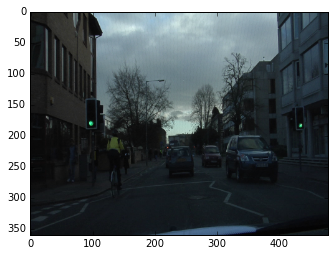

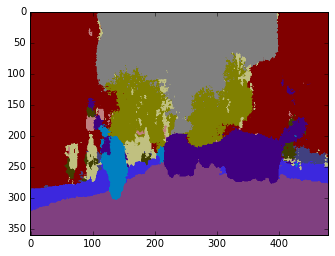

In [15]:

rgb = np.zeros((ind.shape[0], ind.shape[1], 3))
rgb[:,:,0] = r/255.0
rgb[:,:,1] = g/255.0
rgb[:,:,2] = b/255.0
#rgb_gt = np.zeros((ind.shape[0], ind.shape[1], 3))
#rgb_gt[:,:,0] = r_gt/255.0
#rgb_gt[:,:,1] = g_gt/255.0
#rgb_gt[:,:,2] = b_gt/255.0

image = image/255.0

image = np.transpose(image, (1,2,0))
output = np.transpose(output, (1,2,0))
image = image[:,:,(2,1,0)]


#scipy.misc.toimage(rgb, cmin=0.0, cmax=255).save(IMAGE_FILE+'_segnet.png')

plt.figure()
plt.imshow(image,vmin=0, vmax=1)
plt.figure()
#plt.imshow(rgb_gt,vmin=0, vmax=1)
#plt.figure()
plt.imshow(rgb,vmin=0, vmax=1)
plt.show()





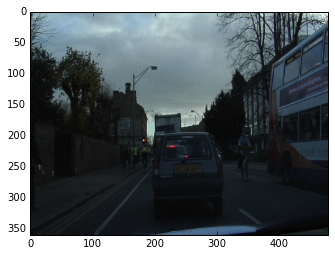

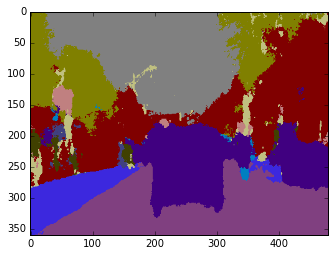

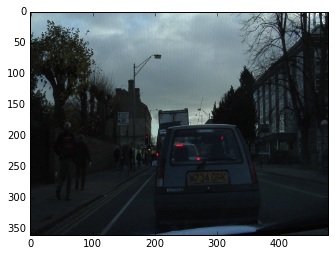

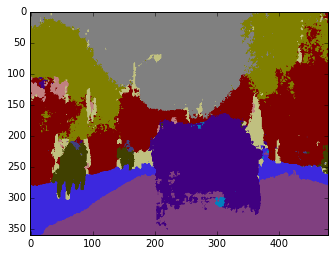

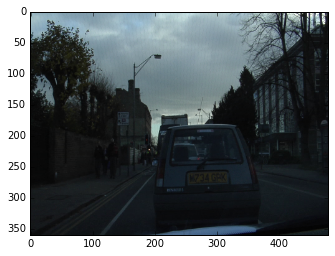

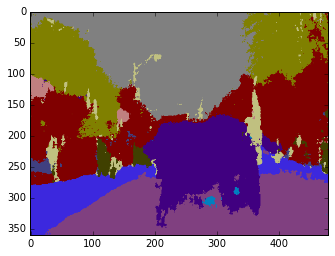

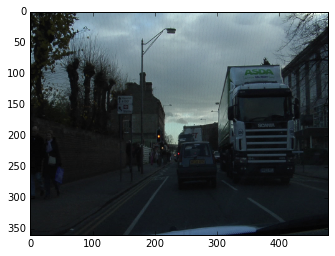

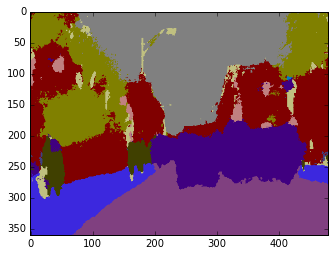

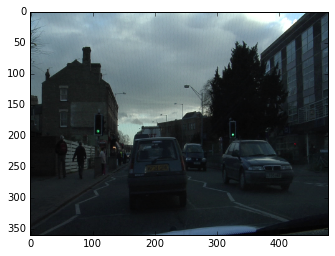

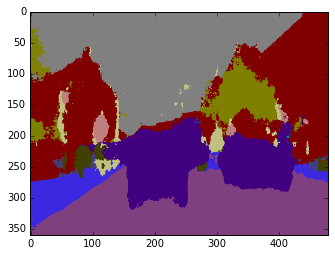

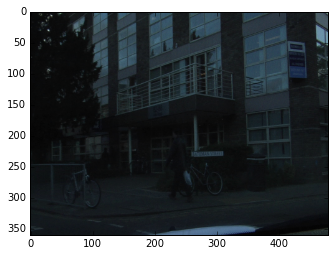

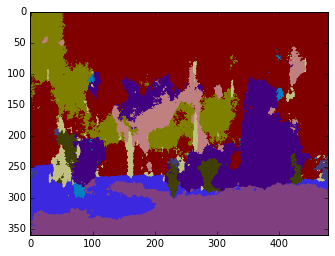

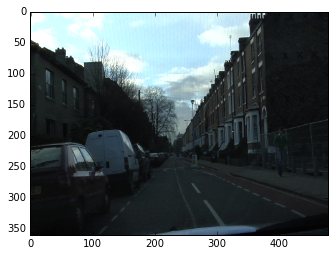

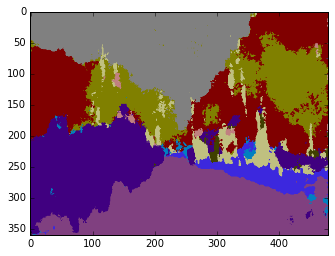

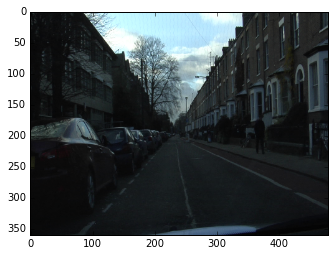

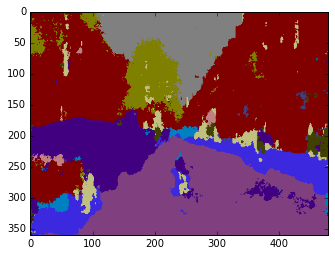

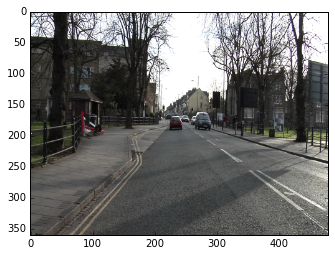

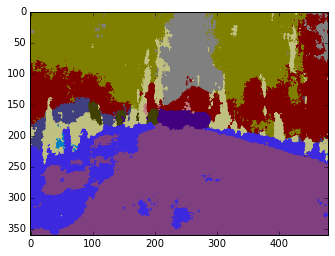

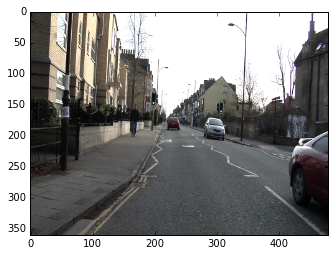

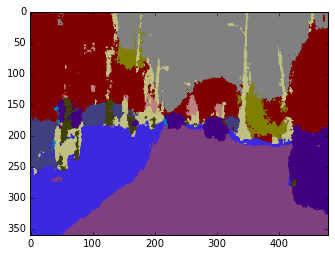

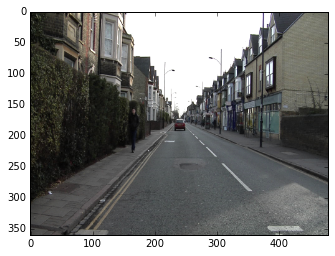

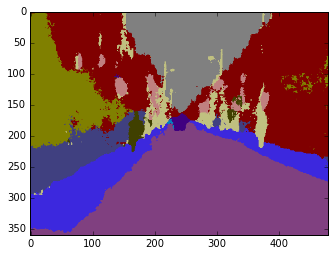

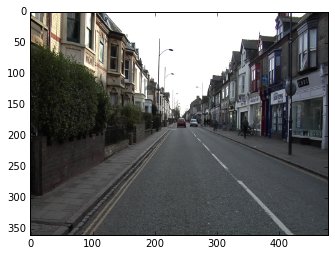

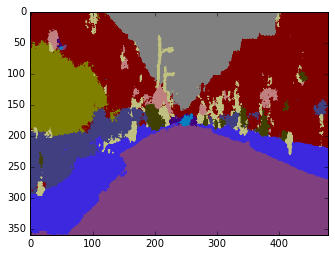

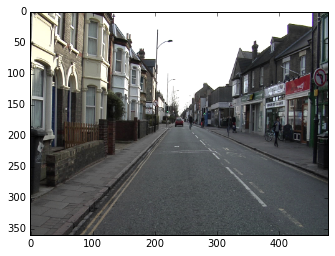

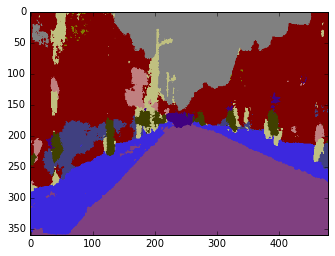

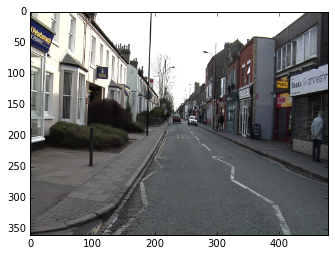

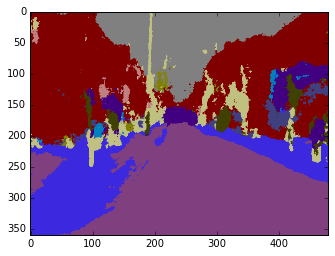

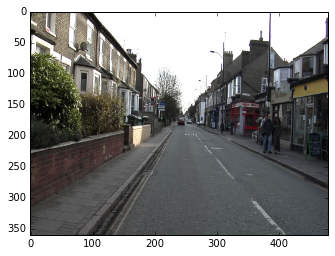

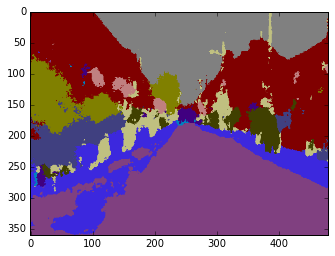

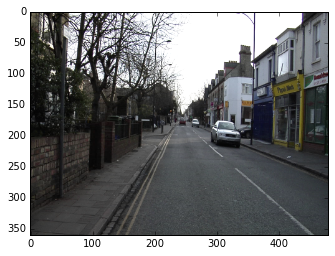

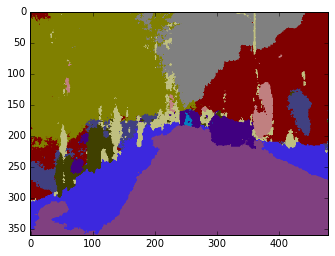

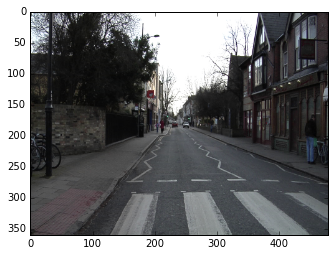

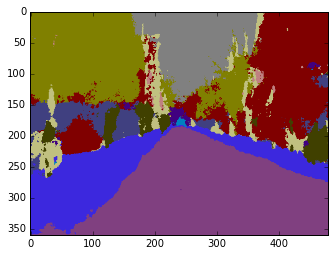

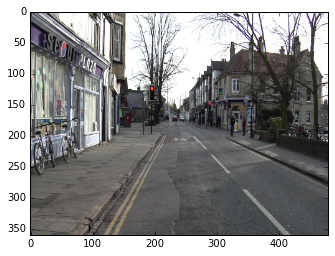

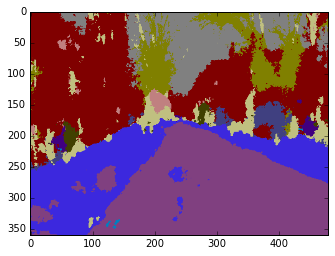

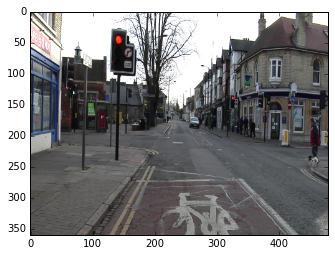

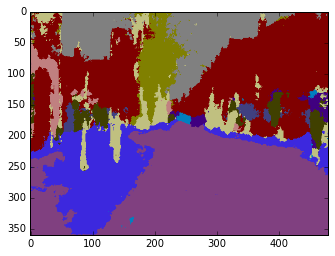

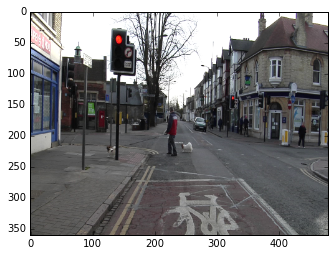

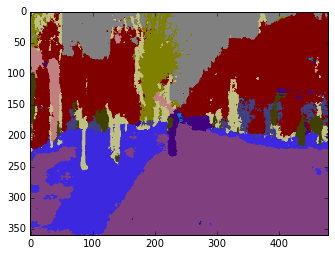

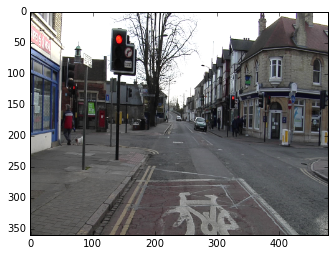

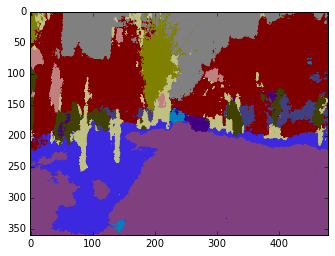

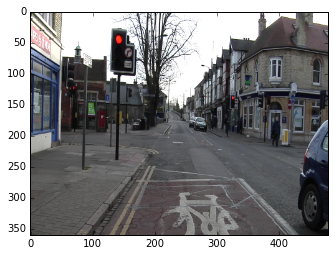

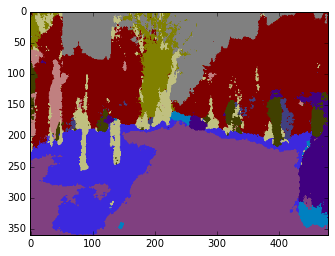

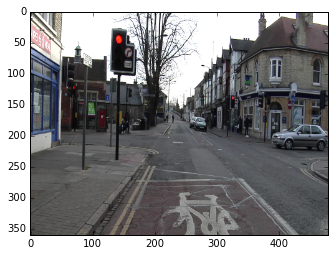

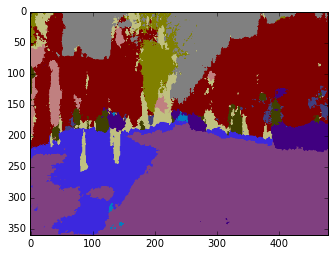

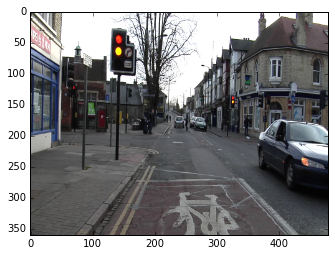

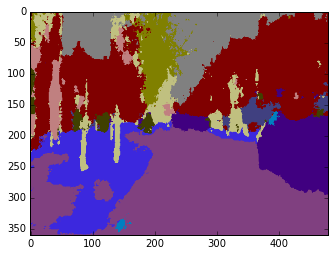

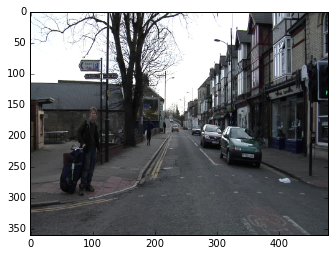

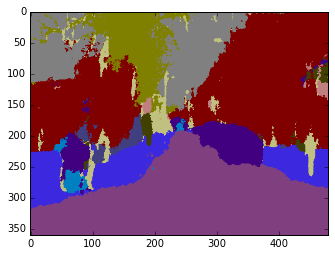

Success!
32.5615210533


In [17]:
import time
start = time.time()

for i in range(0, 25):

	net.forward()

	image = net.blobs['data'].data
	label = net.blobs['label'].data
	predicted = net.blobs['prob'].data
	image = np.squeeze(image[0,:,:,:])
	output = np.squeeze(predicted[0,:,:,:])
	ind = np.argmax(output, axis=0)

	r = ind.copy()
	g = ind.copy()
	b = ind.copy()
	r_gt = label.copy()
	g_gt = label.copy()
	b_gt = label.copy()

	Sky = [128,128,128]
	Building = [128,0,0]
	Pole = [192,192,128]
	Road_marking = [255,69,0]
	Road = [128,64,128]
	Pavement = [60,40,222]
	Tree = [128,128,0]
	SignSymbol = [192,128,128]
	Fence = [64,64,128]
	Car = [64,0,128]
	Pedestrian = [64,64,0]
	Bicyclist = [0,128,192]
	Unlabelled = [0,0,0]

	label_colours = np.array([Sky, Building, Pole, Road, Pavement, Tree, SignSymbol, Fence, Car, Pedestrian, Bicyclist, Unlabelled])
	for l in range(0,11):
		r[ind==l] = label_colours[l,0]
		g[ind==l] = label_colours[l,1]
		b[ind==l] = label_colours[l,2]
		r_gt[label==l] = label_colours[l,0]
		g_gt[label==l] = label_colours[l,1]
		b_gt[label==l] = label_colours[l,2]

	rgb = np.zeros((ind.shape[0], ind.shape[1], 3))
	rgb[:,:,0] = r/255.0
	rgb[:,:,1] = g/255.0
	rgb[:,:,2] = b/255.0
	#rgb_gt = np.zeros((ind.shape[0], ind.shape[1], 3))
	#rgb_gt[:,:,0] = r_gt/255.0
	#rgb_gt[:,:,1] = g_gt/255.0
	#rgb_gt[:,:,2] = b_gt/255.0

	image = image/255.0

	image = np.transpose(image, (1,2,0))
	output = np.transpose(output, (1,2,0))
	image = image[:,:,(2,1,0)]


	#scipy.misc.toimage(rgb, cmin=0.0, cmax=255).save(IMAGE_FILE+'_segnet.png')

	plt.figure()
	plt.imshow(image,vmin=0, vmax=1)
	plt.figure()
	#plt.imshow(rgb_gt,vmin=0, vmax=1)
	#plt.figure()
	plt.imshow(rgb,vmin=0, vmax=1)
	plt.show()


print 'Success!'

end = time.time()

print (end - start)
